In [1]:
import pandas as pd
import matplotlib.pyplot as plt  #Visualization
import seaborn as sns #Visualization
import numpy as np

In [2]:
## loading the csv file 
df=pd.read_csv('data.csv')

In [3]:
## printing the head of the dataframe
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
#Checking for the data size of all the columns
#Summary of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non-null  int64  
dtypes: float64(3), int64(5

In [5]:
df.shape

(11914, 16)

In [7]:
## Initializing cols_to_drop and dropping some columns we dont need
cols_to_drop = ["Engine Fuel Type", "Market Category", "Vehicle Style", "Popularity", "Number of Doors", "Vehicle Size"]
df=df.drop(cols_to_drop,axis=1)      


In [7]:
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [5]:
#Renaming some specific columns
df=df.rename(columns={'Engine HP':'HP','Engine Cylinders':'Cylinders','MSRP': 'Price'})

In [8]:
df.head()

,Make,Model,Year,HP,Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [10]:
#Counting the number of non-empty values for each row and column
df.count()

Make                 11914
Model                11914
Year                 11914
HP                   11845
Cylinders            11884
Transmission Type    11914
Driven_Wheels        11914
highway MPG          11914
city mpg             11914
MSRP                 11914
dtype: int64

In [11]:
#Dropping duplicate values
df=df.drop_duplicates()

In [12]:
# Counting the number of rows after deleting duplicate rows
df.count()

Make                 10925
Model                10925
Year                 10925
HP                   10856
Cylinders            10895
Transmission Type    10925
Driven_Wheels        10925
highway MPG          10925
city mpg             10925
MSRP                 10925
dtype: int64

In [13]:
##Founding out the total null values in each column
df.isnull().sum()

Make                  0
Model                 0
Year                  0
HP                   69
Cylinders            30
Transmission Type     0
Driven_Wheels         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [14]:
#Removing the rows that contains null values
df=df.dropna()

In [15]:
# Making sure that missing values are removed
df.isnull().sum()

Make                 0
Model                0
Year                 0
HP                   0
Cylinders            0
Transmission Type    0
Driven_Wheels        0
highway MPG          0
city mpg             0
MSRP                 0
dtype: int64

In [16]:
##Generating descriptive statistical value of numerical columns
df.describe()

,Year,HP,Cylinders,highway MPG,city mpg,MSRP
count,10827.000000,10827.000000,10827.000000,10827.000000,10827.000000,1.082700e+04
mean,2010.896370,254.553062,5.691604,26.308119,19.327607,4.249325e+04
std,7.029534,109.841537,1.768551,7.504652,6.643567,6.229451e+04
min,1990.000000,55.000000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,173.000000,4.000000,22.000000,16.000000,2.197250e+04
50%,2015.000000,240.000000,6.000000,25.000000,18.000000,3.084500e+04
75%,2016.000000,303.000000,6.000000,30.000000,22.000000,4.330000e+04
max,2017.000000,1001.000000,16.000000,354.000000,137.000000,2.065902e+06


C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


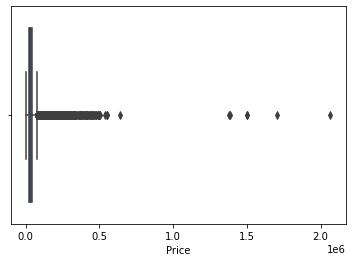

In [45]:
# Ploting a boxplot for 'Price' column in dataset to look for outliers. 
sns.boxplot(df['Price']);

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='HP'>

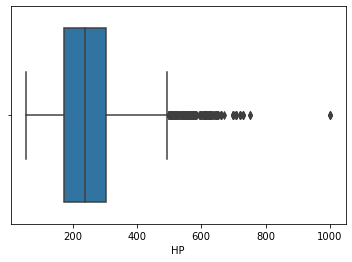

In [18]:
## Ploting a boxplot for 'HP' column in dataset. 
sns.boxplot(df['HP'])

In [32]:
# printing all the columns which are of int or float datatype in df.
df1=df.loc[:,df.dtypes!=object]
df1

,Year,HP,Cylinders,highway MPG,city mpg,Price
0,2011,335.0,6.0,26,19,46135
1,2011,300.0,6.0,28,19,40650
2,2011,300.0,6.0,28,20,36350
3,2011,230.0,6.0,28,18,29450
4,2011,230.0,6.0,28,18,34500
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,46120
11910,2012,300.0,6.0,23,16,56670
11911,2012,300.0,6.0,23,16,50620
11912,2013,300.0,6.0,23,16,50920


In [33]:
# saving column names of the above output in variable list
l=list(df1.columns)

In [34]:
l

['Year', 'HP', 'Cylinders', 'highway MPG', 'city mpg', 'Price']

In [35]:
##Calculating IQR and giving a suitable threshold to remove the outliers and save this new dataframe into df2.
### defining Q1 and Q2
Q1=df.quantile(.25)
Q3=df.quantile(.75)
# defining IQR (interquantile range) 
IQR=Q3-Q1
# defining df2 after removing outliers
df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df2.head()

C:\Users\USER\AppData\Local\Temp\ipykernel_7984\4168163278.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df2=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]


,Make,Model,Year,HP,Cylinders,Transmission Type,Driven_Wheels,highway MPG,city mpg,Price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,28,18,34500


In [ ]:
# printing the shape difference of df and df2

In [26]:
df.shape


(10827, 10)

In [27]:
df2.shape

(9191, 10)

In [29]:
# finding unique values and there counts in each column in df using value counts function.
for i in df.columns:
     print ("--------------- %s ----------------" % i)
     print(df[i].value_counts())

--------------- Make ----------------
Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo      

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


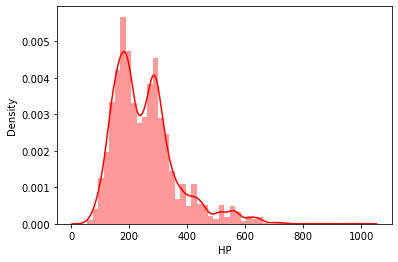

In [30]:
#ploting distplot for variable HP
sns.distplot(df['HP'],color='red');

C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\USER\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

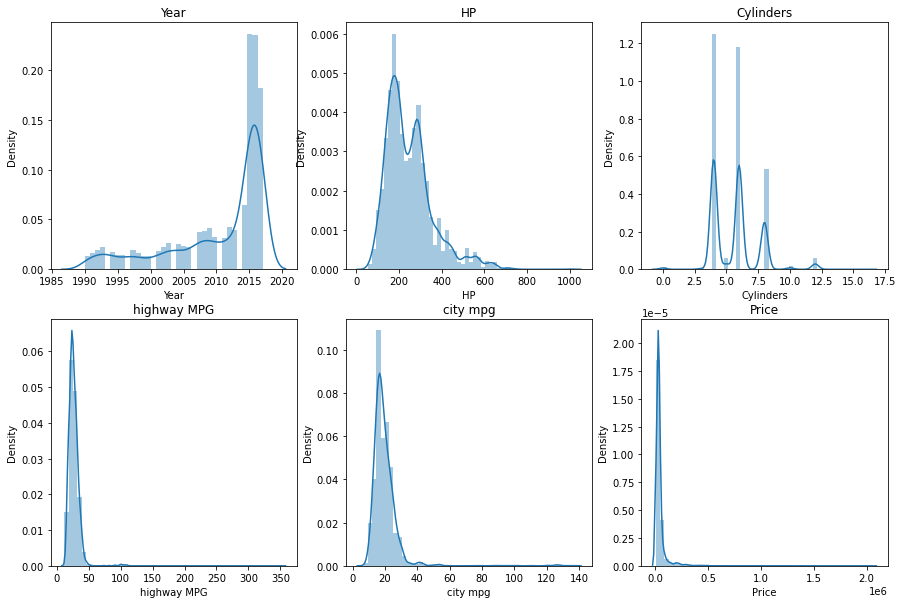

In [43]:
# ploting all the columns present in list l together using subplot of dimention (2,3).
c=0
plt.figure(figsize=(15,10))
for i in l:
    c=c+1
    plt.subplot(2,3,c)
    plt.title(i)
    sns.distplot(df[i])
plt.show()

Text(0.5, 0, 'Make')

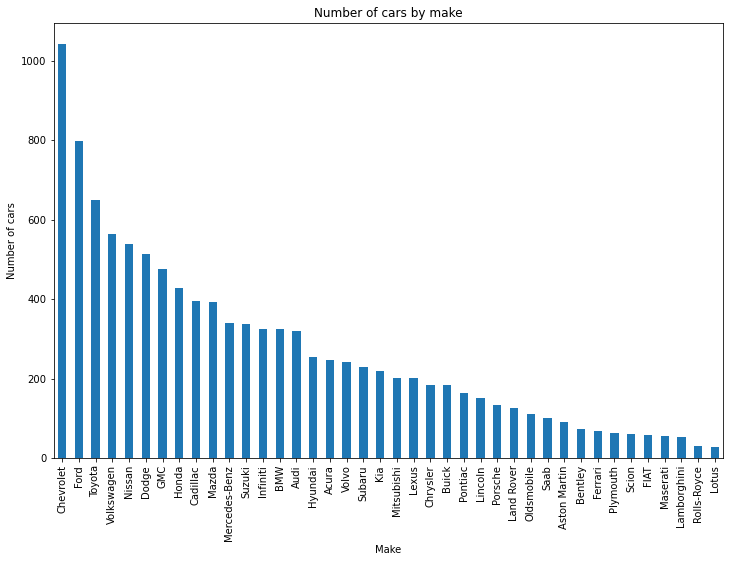

In [32]:

plt.figure(figsize = (12,8))

# using nlargest and then .plot to get bar plot like below output
df['Make'].value_counts().nlargest(40).plot(kind='bar')

plt.title("Number of cars by make")
plt.ylabel('Number of cars')
plt.xlabel('Make')

In [33]:
df['Make'].value_counts()

Chevrolet        1043
Ford              798
Toyota            651
Volkswagen        563
Nissan            540
Dodge             513
GMC               475
Honda             429
Cadillac          396
Mazda             392
Mercedes-Benz     340
Suzuki            338
Infiniti          326
BMW               324
Audi              320
Hyundai           254
Acura             246
Volvo             241
Subaru            229
Kia               219
Mitsubishi        202
Lexus             201
Chrysler          185
Buick             184
Pontiac           163
Lincoln           152
Porsche           134
Land Rover        126
Oldsmobile        111
Saab              101
Aston Martin       91
Bentley            74
Ferrari            69
Plymouth           62
Scion              60
FIAT               58
Maserati           55
Lamborghini        52
Rolls-Royce        31
Lotus              28
HUMMER             17
Maybach            16
McLaren             5
Alfa Romeo          5
Genesis             3
Bugatti   

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission Type', ylabel='count'>

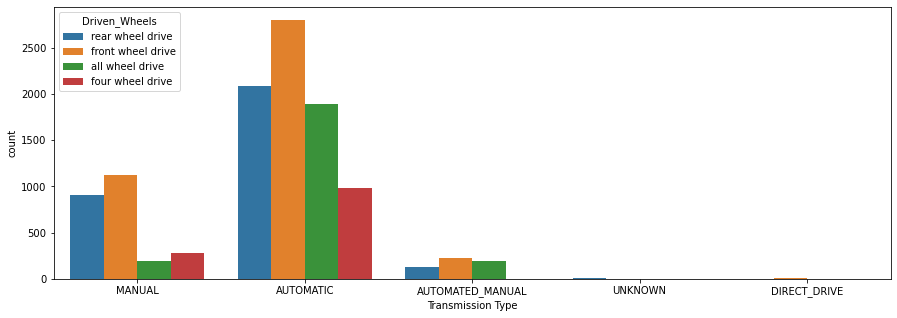

In [34]:
# plotting countplot on transmission and drive mode
plt.figure(figsize=(15,5))
sns.countplot(df['Transmission Type'],hue=df['Driven_Wheels'])

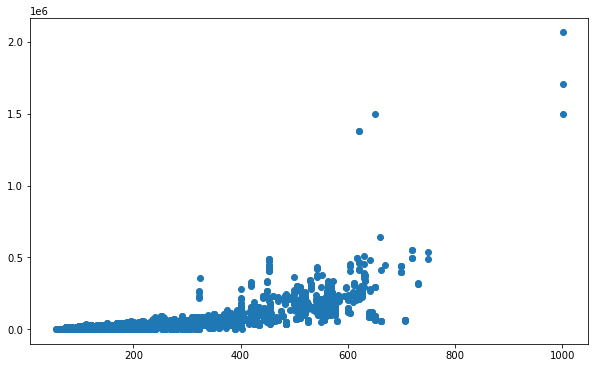

In [35]:
# ploting scatterplot on hp and price
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(df['HP'],df['MSRP'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


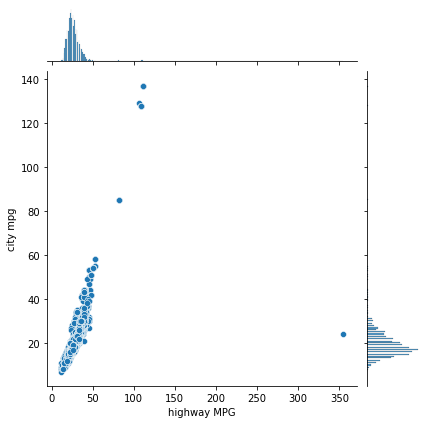

In [36]:
#Plotting joint plots of MPG_H and MPG-C
sns.jointplot(df['highway MPG'],df['city mpg'])

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Cylinders', ylabel='MSRP'>

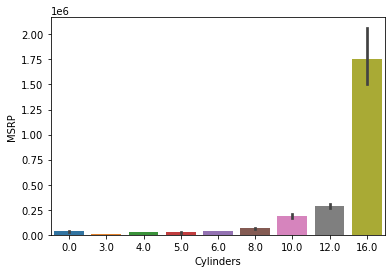

In [37]:
# Plotting bar plot with default statistic=mean between Cylinder and Price
sns.barplot(df['Cylinders'],df['MSRP'],estimator=np.mean)

C:\Users\USER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='MSRP', ylabel='Transmission Type'>

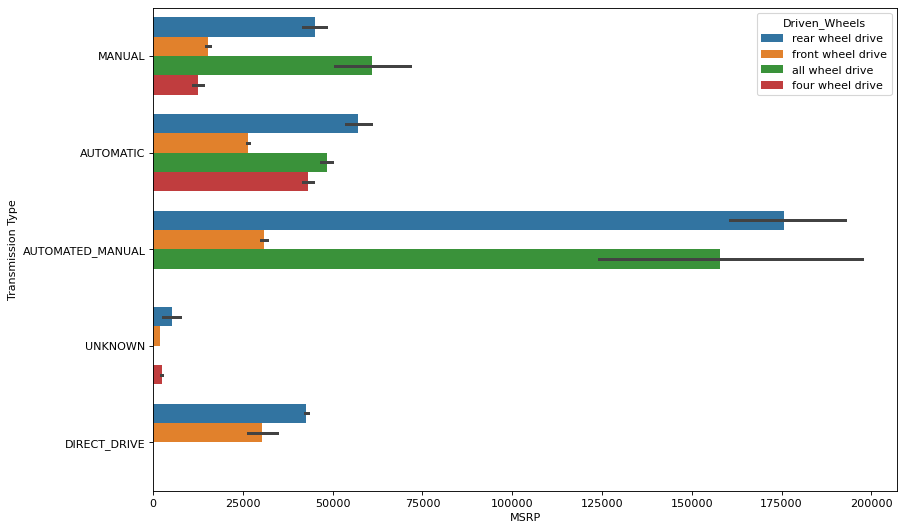

In [38]:
# Plotting bar plot for Price and Transmission , specifying hue="Drive Mode"
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(df['MSRP'],df['Transmission Type'],hue=df['Driven_Wheels'])

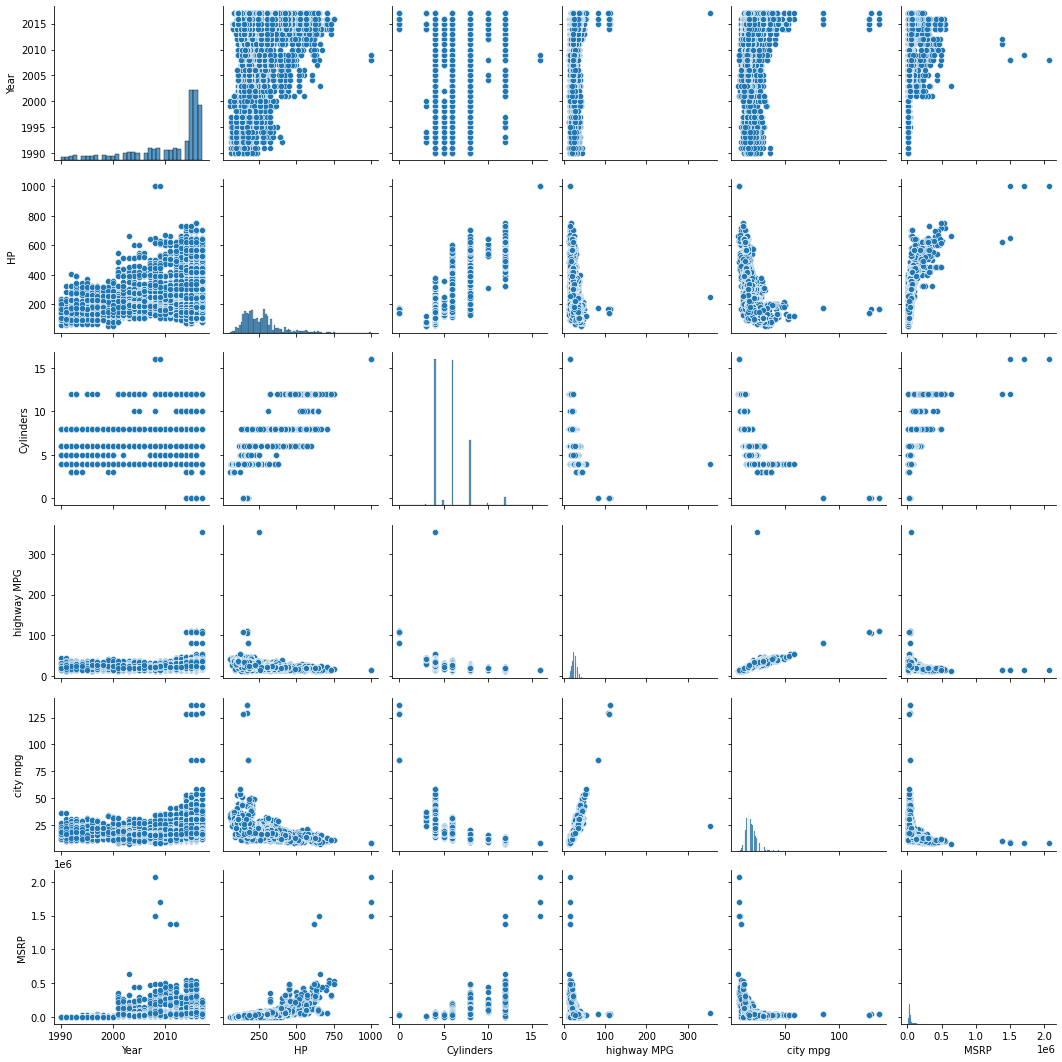

In [39]:
# plotting pairplot on df
sns.pairplot(df);

In [40]:
#find the correlation of features of the data 
corr=df.corr()
corr

,Year,HP,Cylinders,highway MPG,city mpg,MSRP
Year,1.000000,0.314971,-0.050598,0.284237,0.234135,0.196789
HP,0.314971,1.000000,0.788007,-0.420281,-0.473551,0.659835
Cylinders,-0.050598,0.788007,1.000000,-0.611576,-0.632407,0.554740
highway MPG,0.284237,-0.420281,-0.611576,1.000000,0.841229,-0.209150
city mpg,0.234135,-0.473551,-0.632407,0.841229,1.000000,-0.234050
MSRP,0.196789,0.659835,0.554740,-0.209150,-0.234050,1.000000


<AxesSubplot:>

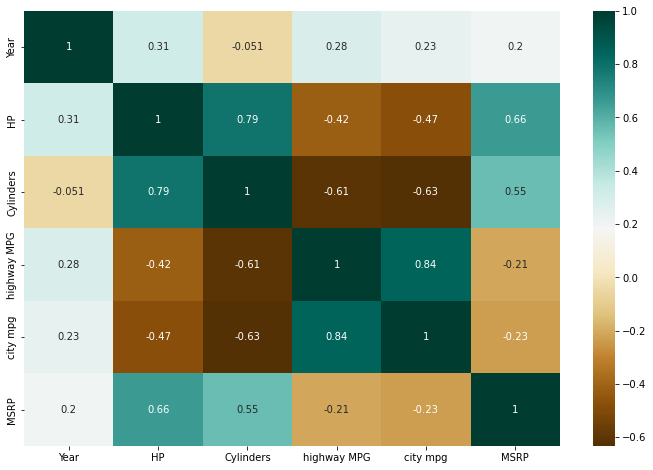

In [41]:
# Using the correlated df plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr,cmap = 'BrBG', annot = True)